In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext dotenv
%dotenv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [11]:
import pandas as pd
import logging
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import ipywidgets as widgets
from galaxies import plot_2Dmap, make_sample, detect_scan_from_filename
import os
import glob

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [3]:
pixel_calibration = np.array([2.02640772e-01, 2.44374424e+03])
roi_left = [70, 100]
roi_right = [285, 315]

# Folder overview

In [4]:
def foo():

    files = sorted(glob.glob(os.path.join(os.environ['DATA_PATH'], 'Electrode*.nxs')))
    # filter for file numbers 21 and above
    files = [f for f in files if int(os.path.basename(f).split('_')[1]) >= 21]

    data = []
    for filename in files:
        scan_type, scan_command, all_data = detect_scan_from_filename(filename, include_full_data=True)
        time_start = all_data.get('start_time', None)
        sample_zs = all_data.get('sample_zs', None)
        number_of_energies = len(all_data.get('energies', []))
        number_of_images = len(all_data.get('images', []))
        exposure_time = all_data.get('exposure_time', [0])[0]/1000  # Convert from ms to seconds

        data.append((time_start, os.path.basename(filename), scan_type, number_of_energies, number_of_images, exposure_time, sample_zs, scan_command))
    df = pd.DataFrame(data, columns=['start_time', 'filename', 'scan_type', 'ene_steps', 'frames', 'seconds_per_step', 'sample Z', 'scan_command'])
    return df.sort_values(by='start_time', ascending=False)

foo()

start_time               filename          scan_type  ene_steps  \
220  2025-05-31T21:39:07  Electrode_23_0059.nxs           XAS scan          0   
219  2025-05-31T21:37:56  Electrode_23_0058.nxs       XES one shot          0   
218  2025-05-31T21:36:41  Electrode_23_0057.nxs       XES one shot          0   
217  2025-05-31T21:35:30  Electrode_23_0056.nxs       XES one shot          0   
216  2025-05-31T21:34:21  Electrode_23_0055.nxs       XES one shot          0   
..                   ...                    ...                ...        ...   
4    2025-05-30T21:56:48  Electrode_21_0005.nxs  sample alignement          0   
3    2025-05-30T21:51:18  Electrode_21_0004.nxs       XES one shot          0   
2    2025-05-30T21:48:31  Electrode_21_0003.nxs       XES one shot          0   
1    2025-05-30T21:38:38  Electrode_21_0002.nxs           XAS scan          0   
0    2025-05-30T21:24:59  Electrode_21_0001.nxs           XAS scan          0   

     frames  seconds_per_step         sample Z  \
220       0              60.0   [-43.49846214]   
219       1              60.0   [-43.49846214]   
218       1              60.0   [-43.49846214]   
217       1              60.0   [-43.49846214]   
216       1              60.0   [-43.49846214]   
..      ...               ...              ...   
4         0              60.0  [-41.999349715]   
3         1              60.0  [-41.999349715]   
2         1              10.0  [-41.999349715]   
1         0              60.0  [-41.999349715]   
0         0              60.0  [-41.999349715]   

                                scan_command  
220    a_stepscan bl_energy 2460 2490 150 1   
219                                           
218                                           
217                                           
216                                           
..                                       ...  
4            d_stepscan sample_xs -2 2 10 1   
3                                             
2                                             
1    a_stepscan bl_energy 2465 2490 125 0.5   
0      a_stepscan bl_energy 2465 2490 125 1   

[221 rows x 8 columns]

In [5]:
def compare_XAS(sample_no, numbers):
    files = sorted(glob.glob(os.path.join(os.environ['DATA_PATH'], f'Electrode_{sample_no}_*.nxs')))
    files = [f for f in files if int(os.path.basename(f).split('_')[2]) in numbers]
    data = []
    for filename in files:
        scan_type, scan_command, all_data = detect_scan_from_filename(filename, include_full_data=True)
        time_start = all_data.get('start_time', None)
        sample_zs = all_data.get('sample_zs', None)
        number_of_energies = len(all_data.get('energies', []))
        number_of_images = len(all_data.get('images', []))
        exposure_time = all_data.get('exposure_time', [0])[0]/1000  # Convert from ms to seconds

        data.append((time_start, os.path.basename(filename), scan_type, number_of_energies, number_of_images, exposure_time, sample_zs, scan_command))
    df = pd.DataFrame(data, columns=['start_time', 'filename', 'scan_type', 'ene_steps', 'frames', 'seconds_per_step', 'sample Z', 'scan_command'])
    return df.sort_values(by='start_time', ascending=False)

# Electrode 21

# Electrode 22

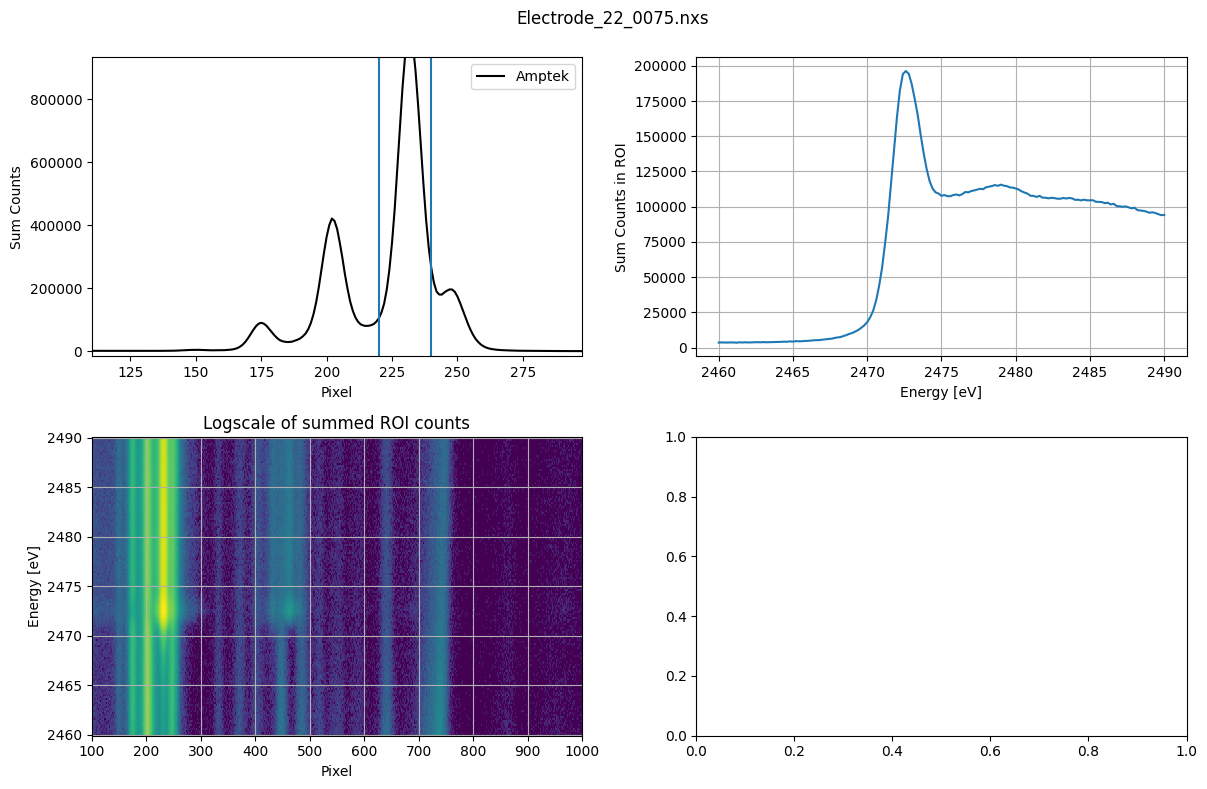

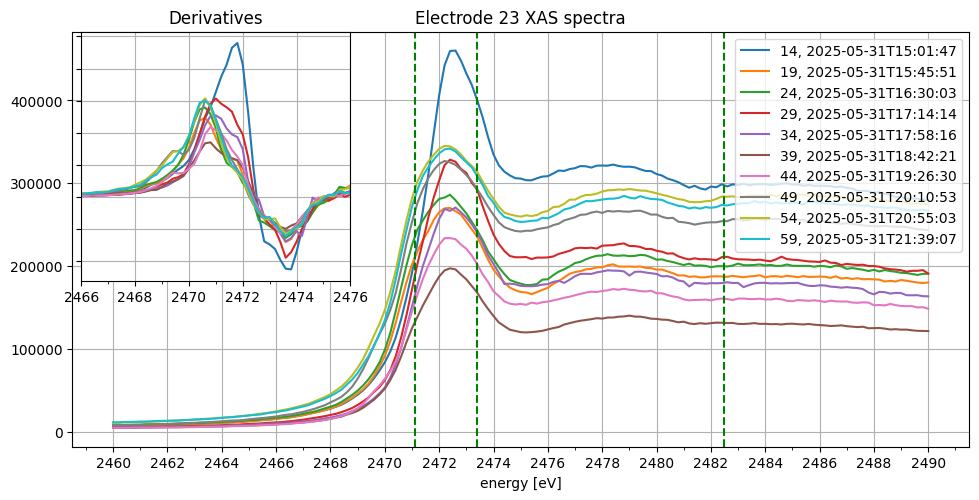

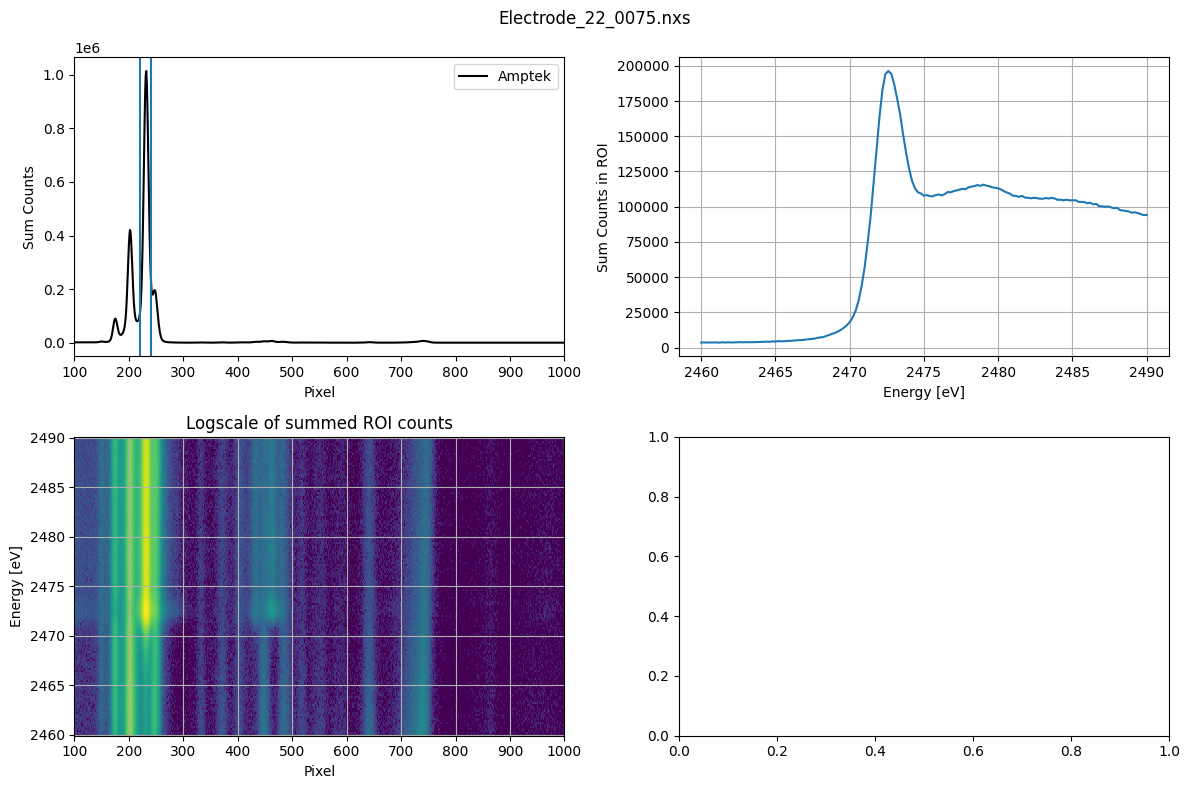

In [9]:
make_sample('Electrode_22_0075.nxs', [[220,240]])

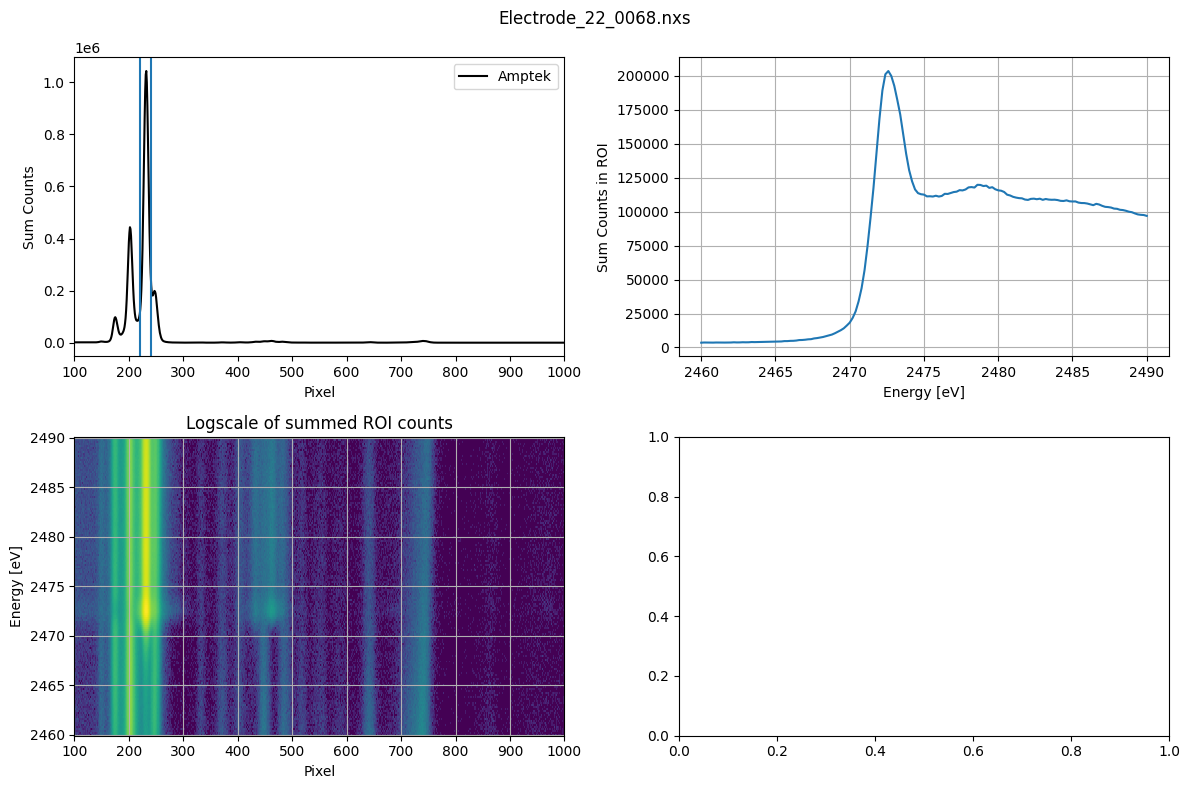

In [12]:
make_sample('Electrode_22_0068.nxs', [[220,240]])

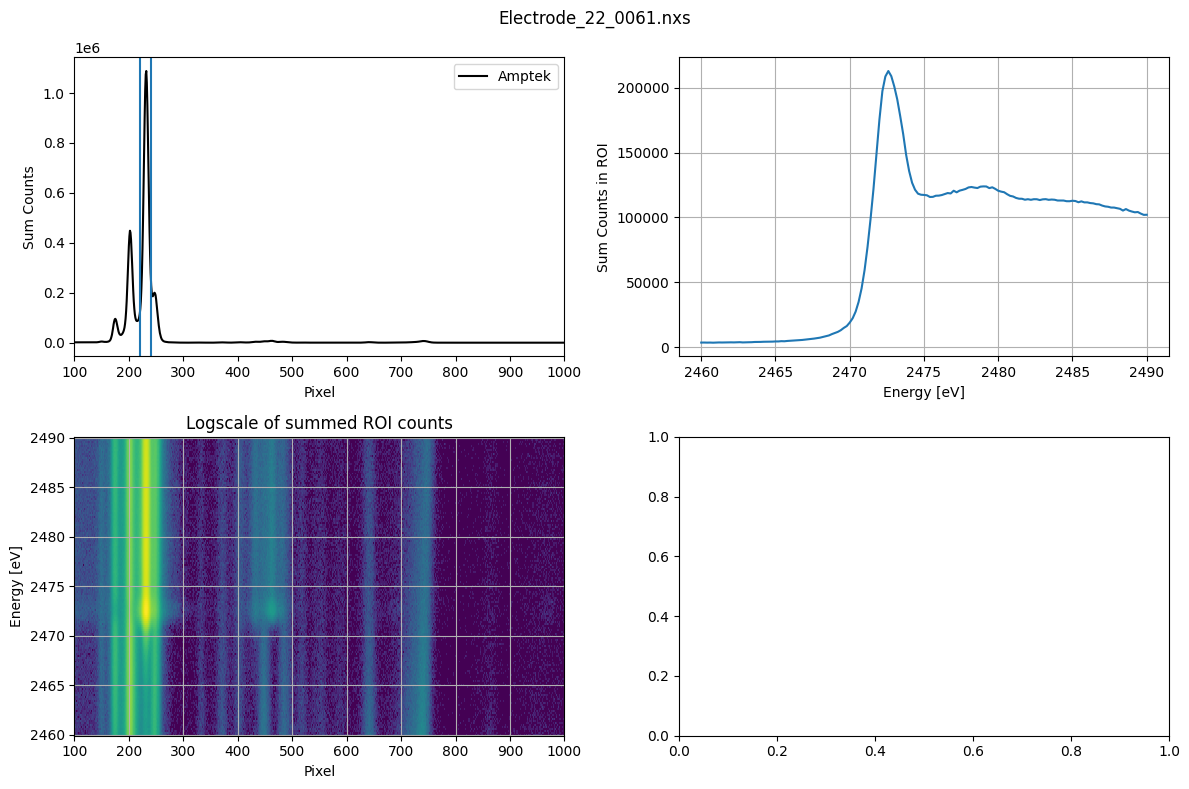

In [13]:
make_sample('Electrode_22_0061.nxs', [[220,240]])

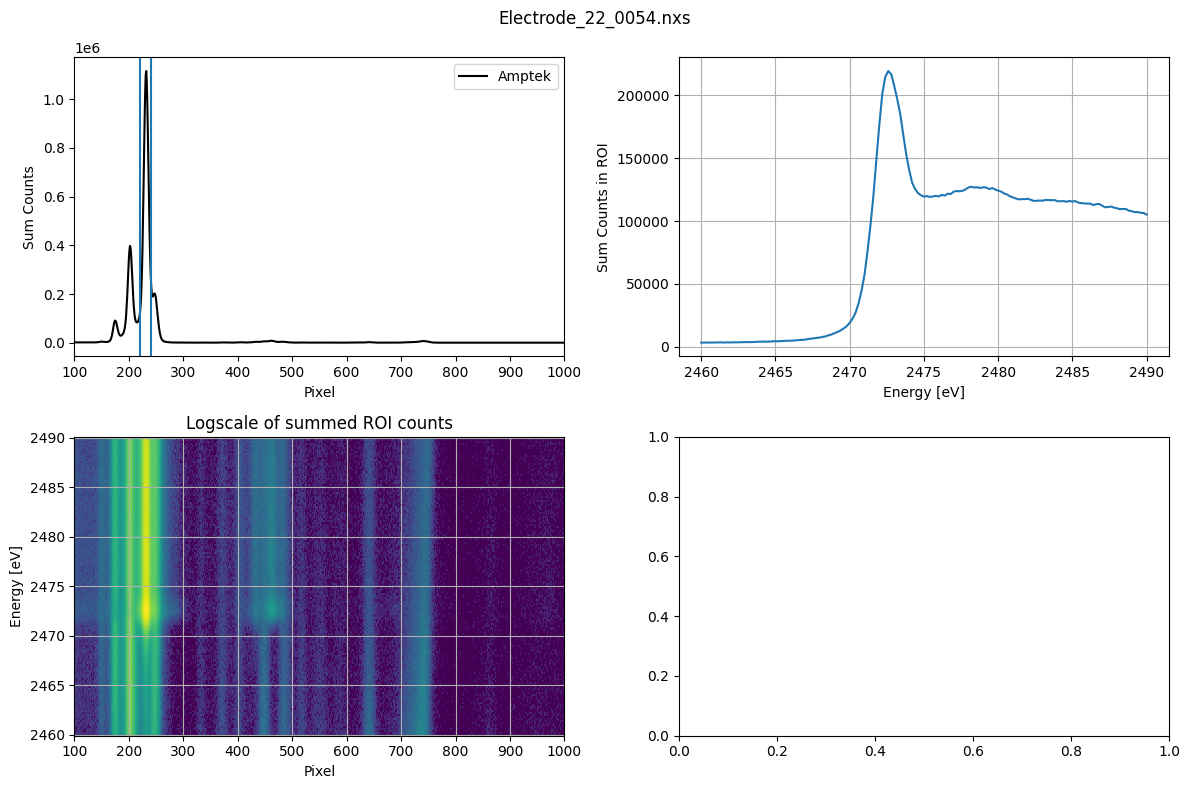

In [19]:
make_sample('Electrode_22_0054.nxs', [[220,240]])

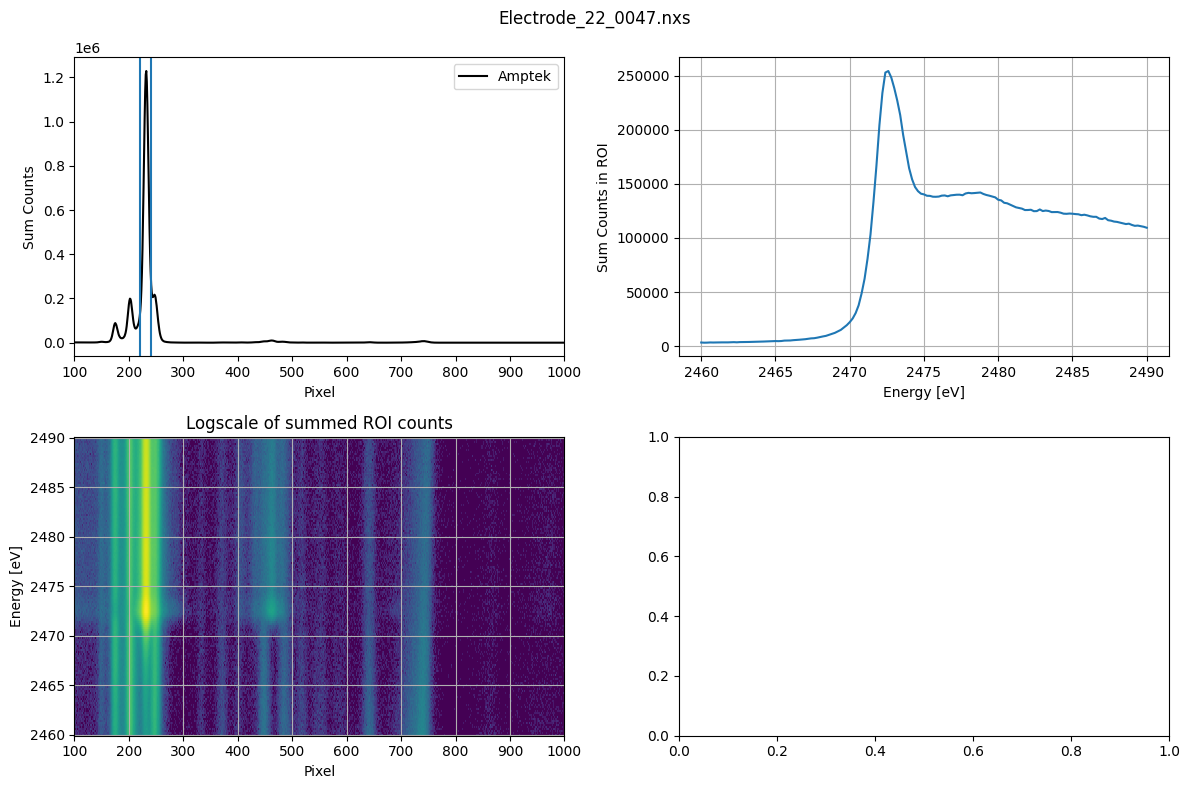

In [20]:
make_sample('Electrode_22_0047.nxs', [[220,240]])

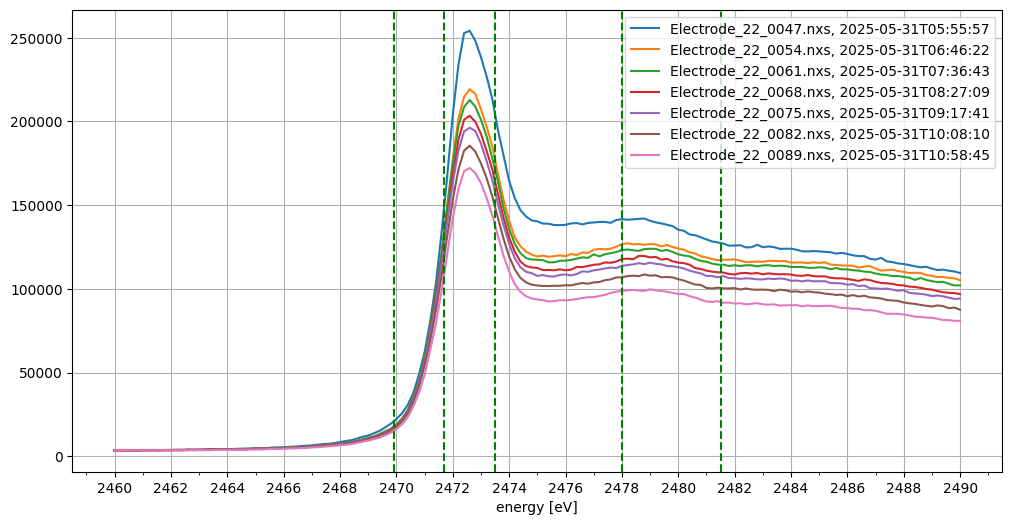

In [190]:
def foo():
    avas_energies = [2469.9, 2471.7, 2473.5, 2478, 2481.5, 2520]
    leg = []
    ax = None
    plt.figure(figsize=(12,6))
    for index in range(47, 1000, 7):
        filename = f'Electrode_22_{index:04d}.nxs'
        ax = plt.gca()
        if os.path.exists(os.path.join(os.environ['DATA_PATH'], filename)):
            df, info = make_sample(filename, [[220,240]], plot=False)
            df.plot(ax=ax)
            leg.append(f"{filename}, {info['start_time']}")
    for e in avas_energies[:-1]:
        ax.axvline(e, color='g', linestyle='--')
    plt.grid(True, 'major')
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.legend(leg)
foo()

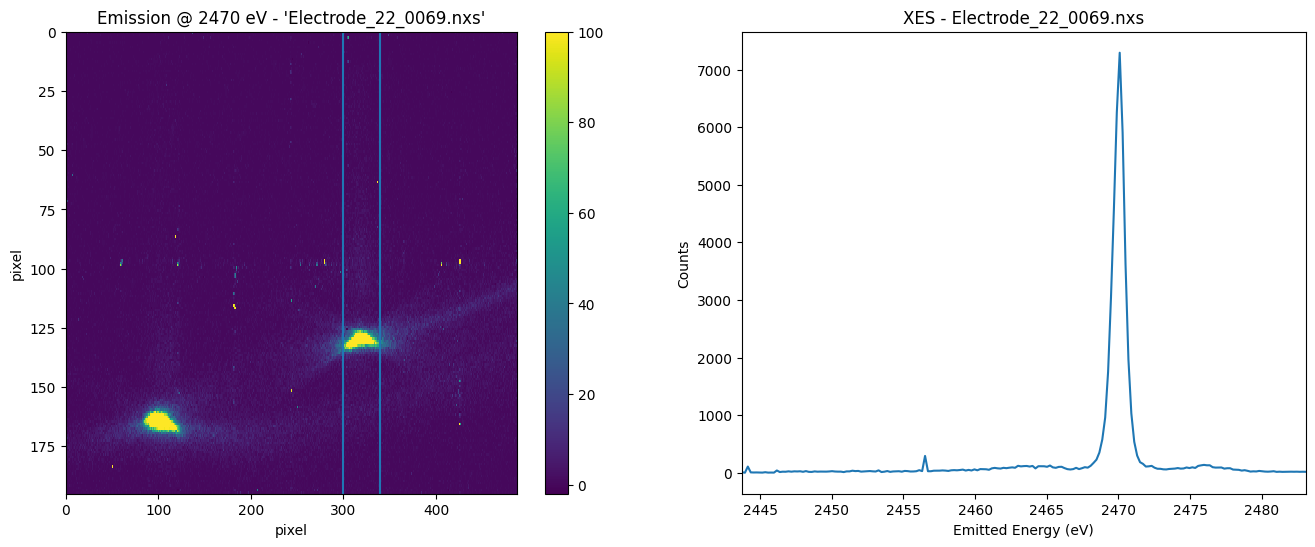

In [40]:
plot_2Dmap('Electrode_22_0069.nxs', pixel_calibration, [300, 340], vmax_sum=100, vmax_rxes=5000,
           replace={'energies': [2469.9]})

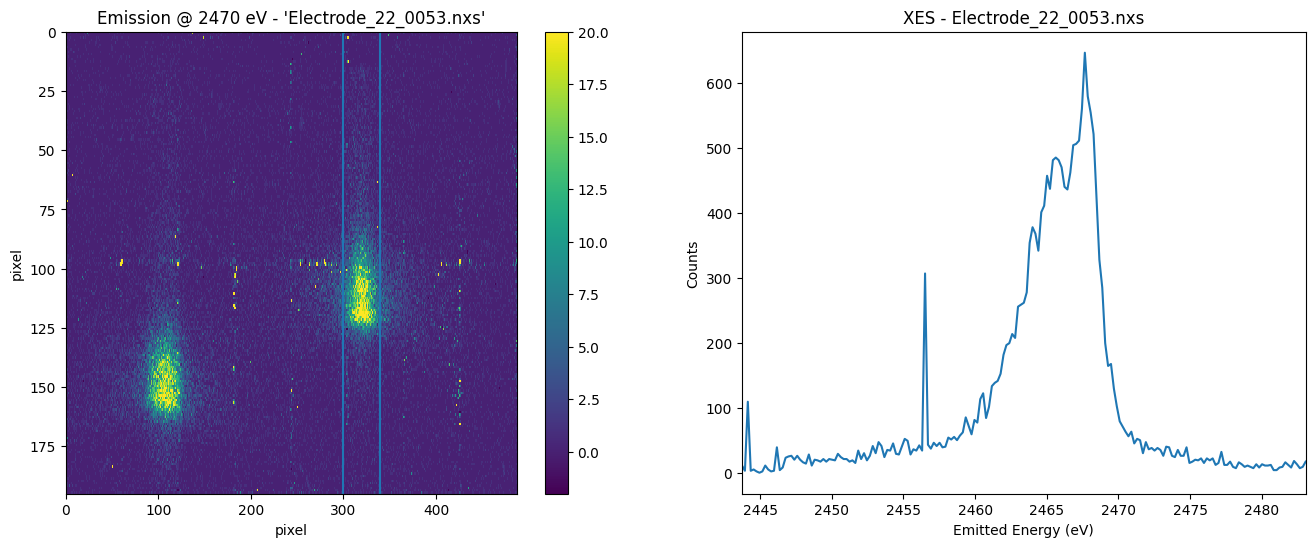

In [71]:
plot_2Dmap('Electrode_22_0053.nxs', pixel_calibration, [300, 340], vmax_sum=20, vmax_rxes=5000,
           replace={'energies': [2469.9]})

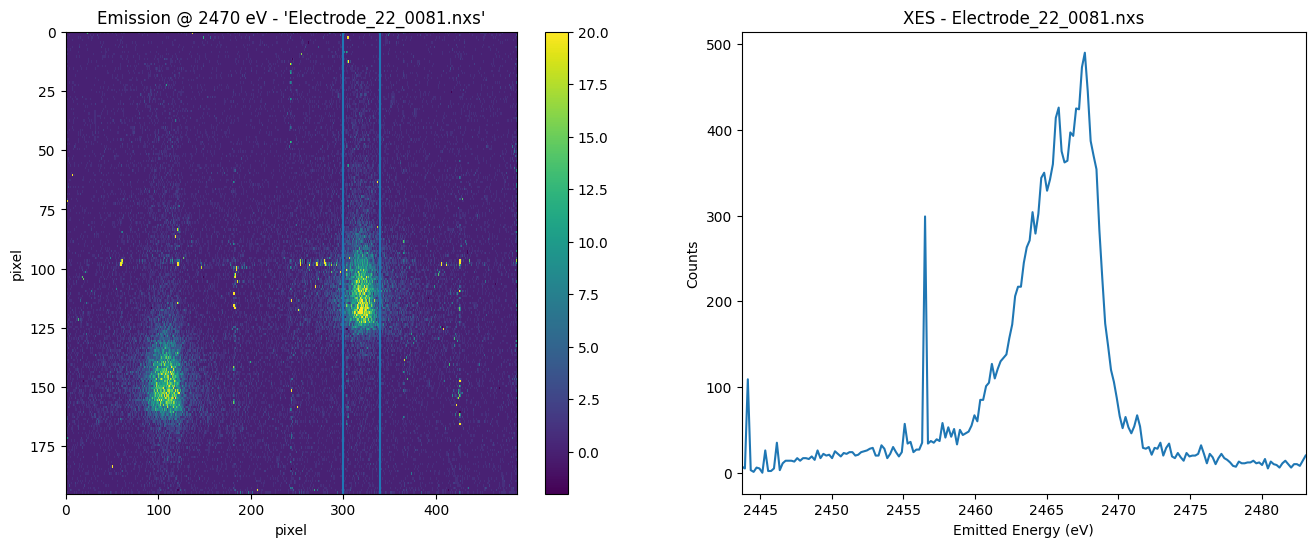

In [73]:
plot_2Dmap('Electrode_22_0081.nxs', pixel_calibration, [300, 340], vmax_sum=20, vmax_rxes=5000,
           replace={'energies': [2469.9]})

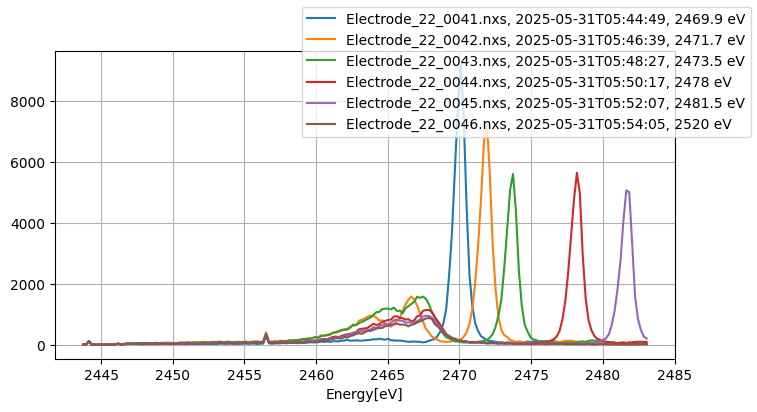

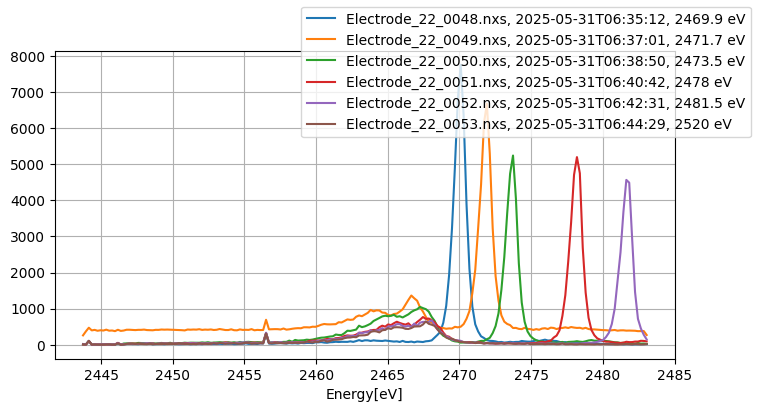

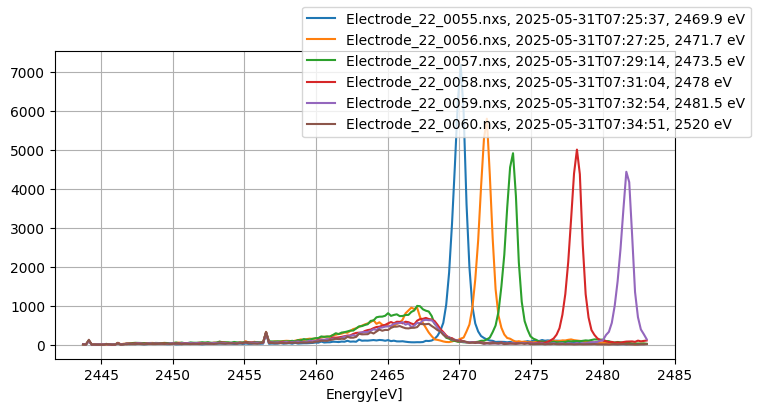

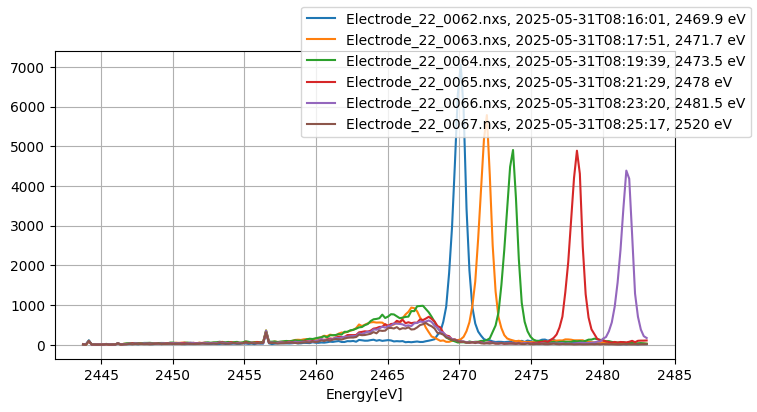

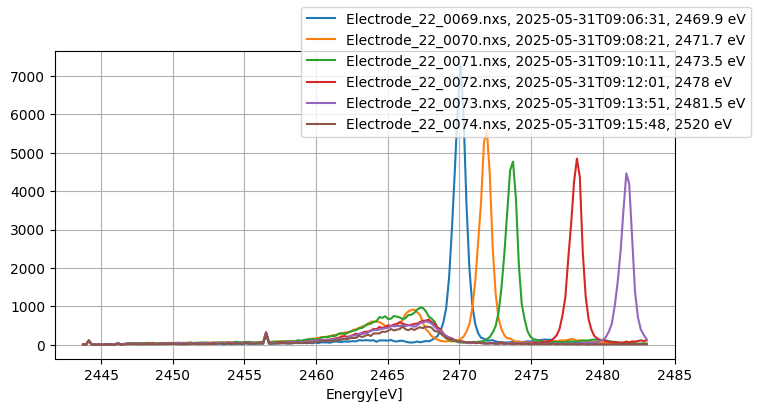

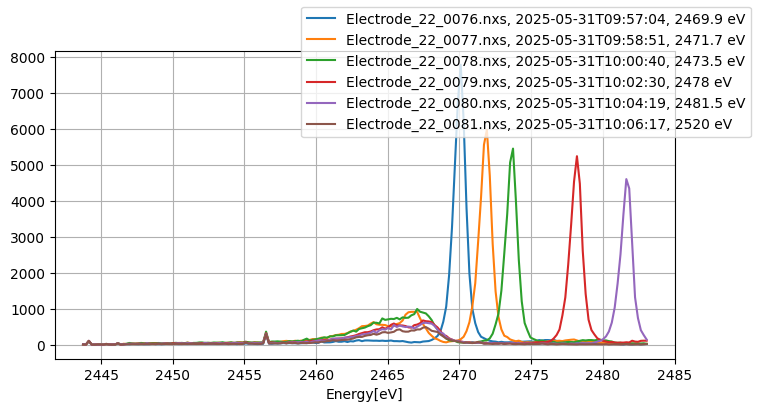

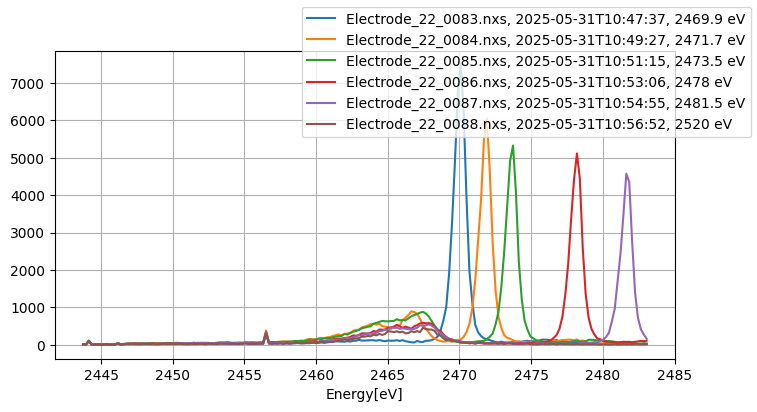

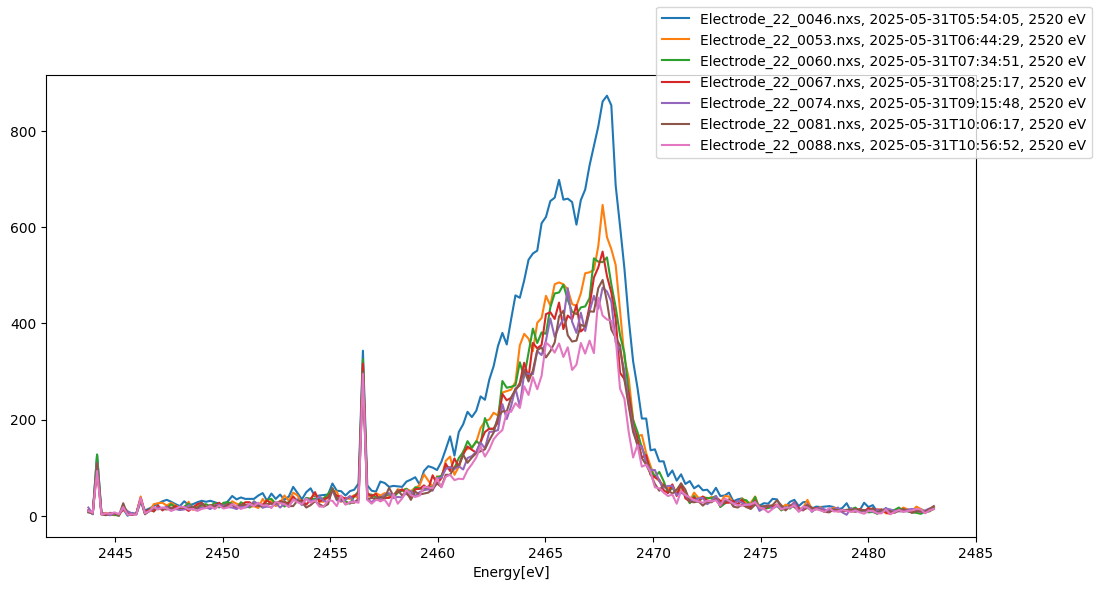

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [194]:
def foo():
    logger.setLevel(logging.INFO)
    avas_energies = [2469.9, 2471.7, 2473.5, 2478,2481.5,2520]
    first_files = range(41, 90, 7)

    fig2 = plt.figure(figsize=(12,6))
    ax1 = None
    leg2 = []

    for first_file in first_files:
        fig1 = plt.figure(figsize=(8,4))
        leg1 = []
        for i, e in zip(range(first_file, first_file+7), avas_energies):
            ax1 = fig1.gca()
            ax2 = fig2.gca()
            filename = f'Electrode_22_{i:04d}.nxs'
            if not os.path.exists(os.path.join(os.environ['DATA_PATH'], filename)):
                continue
            logger.debug(f"Processing {filename} for energy {e}")
            xes, xas, info = plot_2Dmap(filename, pixel_calibration, [300, 340],
                                        vmax_sum=100, vmax_rxes=5000,
                                        replace={'energies': [e]}, plot=False
                                        )
            xes.plot(ax=ax1)
            leg1.append(f"{filename}, {info['start_time']}, {e} eV")
            if e == 2520:
                xes.plot(ax=ax2)
                leg2.append(f"{filename}, {info['start_time']}, {e} eV")
        fig1.legend(leg1)
        ax1.grid()
        display(fig1)
        fig1.clear()

    fig2.legend(leg2)
    # plt.show()


foo()

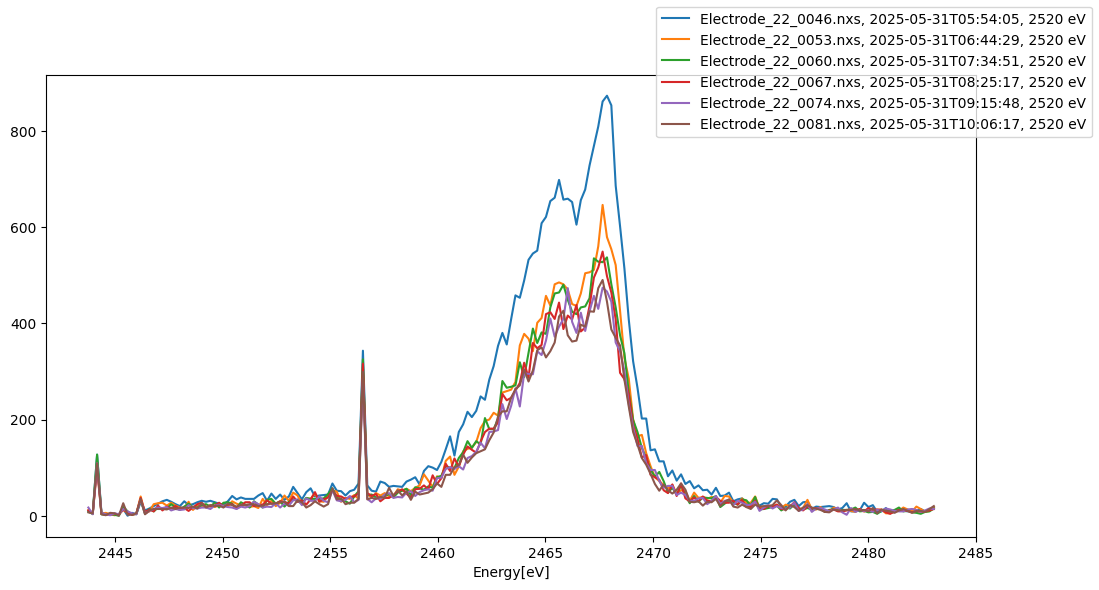

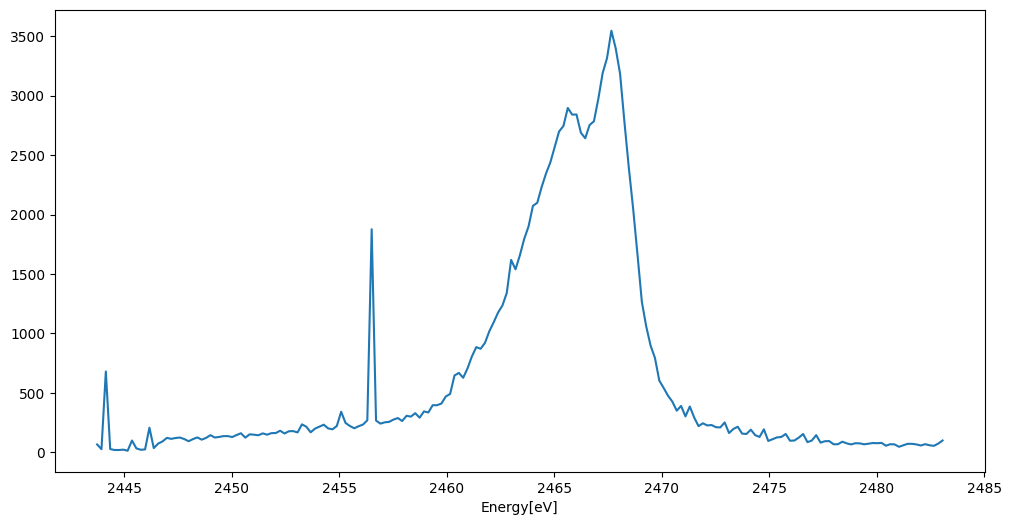

In [89]:
def foo():
    logger.setLevel(logging.INFO)
    avas_energies = [2469.9, 2471.7, 2473.5, 2478, 2481.5, 2520]
    first_files = range(41, 90, 7)


    fig2 = plt.figure(figsize=(12,6))
    leg2 = []
    dfs = []

    for first_file in first_files:
        # fig1 = plt.figure(figsize=(12,6))
        # leg = []
        for i, e in zip(range(first_file, first_file+7), avas_energies):
            # ax = fig1.gca()
            ax2 = fig2.gca()
            filename = f'Electrode_22_{i:04d}.nxs'
            if os.path.exists(os.path.join(os.environ['DATA_PATH'], filename)):
                logger.debug(f"Processing {filename} for energy {e}")
                xes, xas, info = plot_2Dmap(filename, pixel_calibration, [300, 340],
                                            vmax_sum=100, vmax_rxes=5000,
                                            replace={'energies': [e]}, plot=False
                                            )
                # xes.plot(ax=ax)
                # leg.append(f"{filename}, {info['start_time']}, {e} eV")
                if e == 2520:
                    xes.plot(ax=ax2)
                    dfs.append(xes)
                    leg2.append(f"{filename}, {info['start_time']}, {e} eV")
        # fig1.legend(leg)
        # plt.show()

    fig2.legend(leg2)
    plt.show()
    pd.concat(dfs, axis=1).sum(axis=1).plot(figsize=(12,6))

foo()

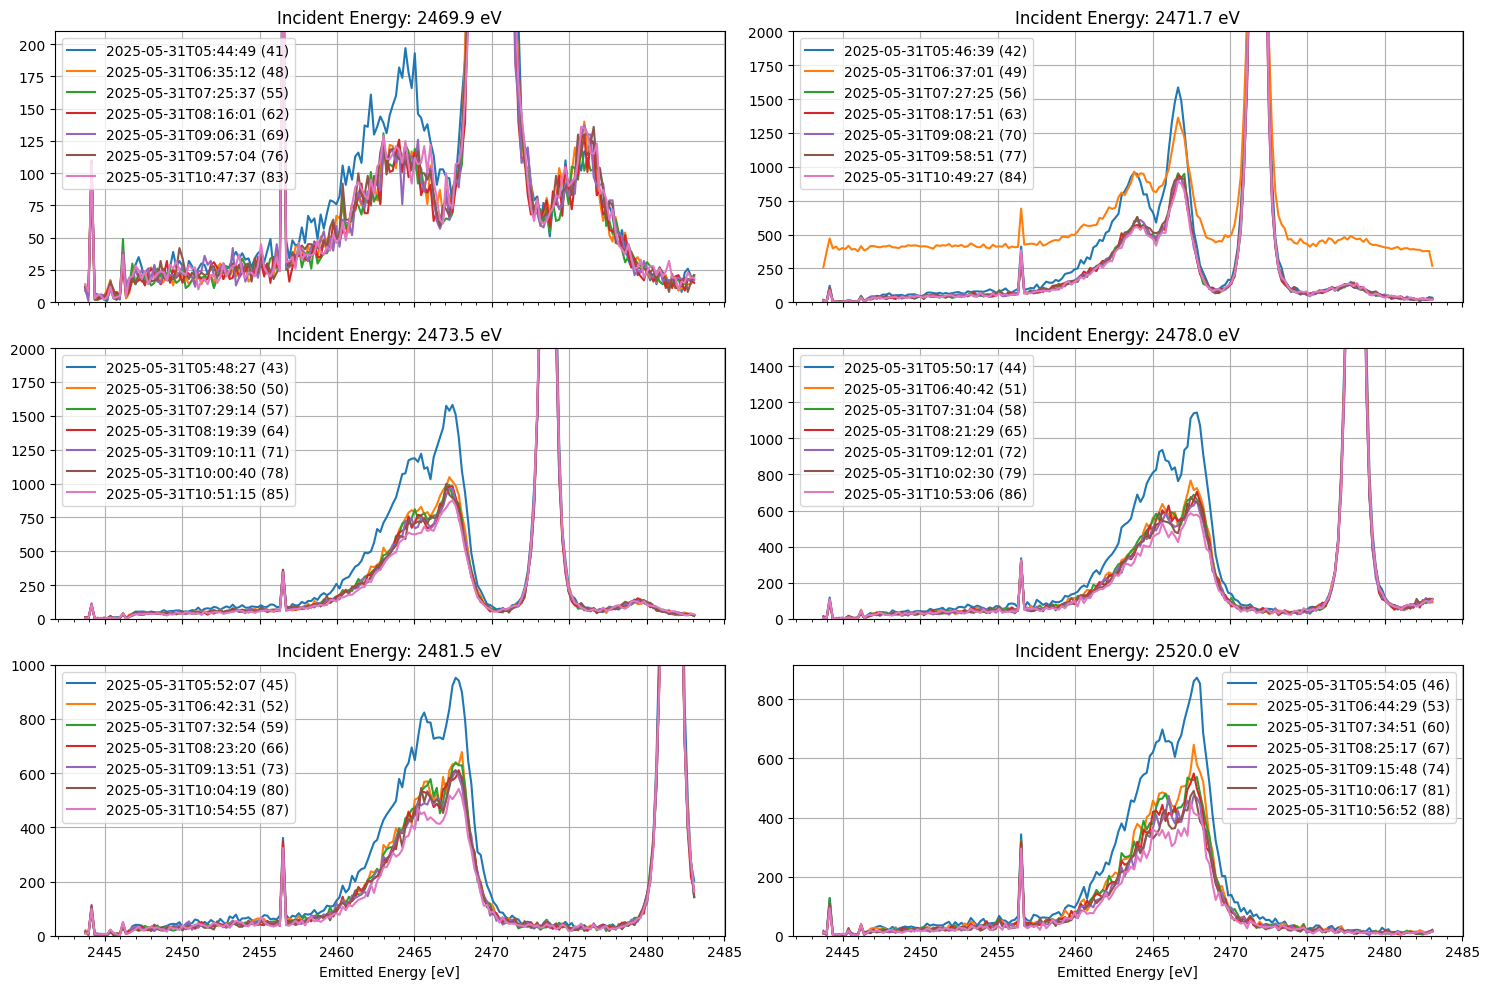

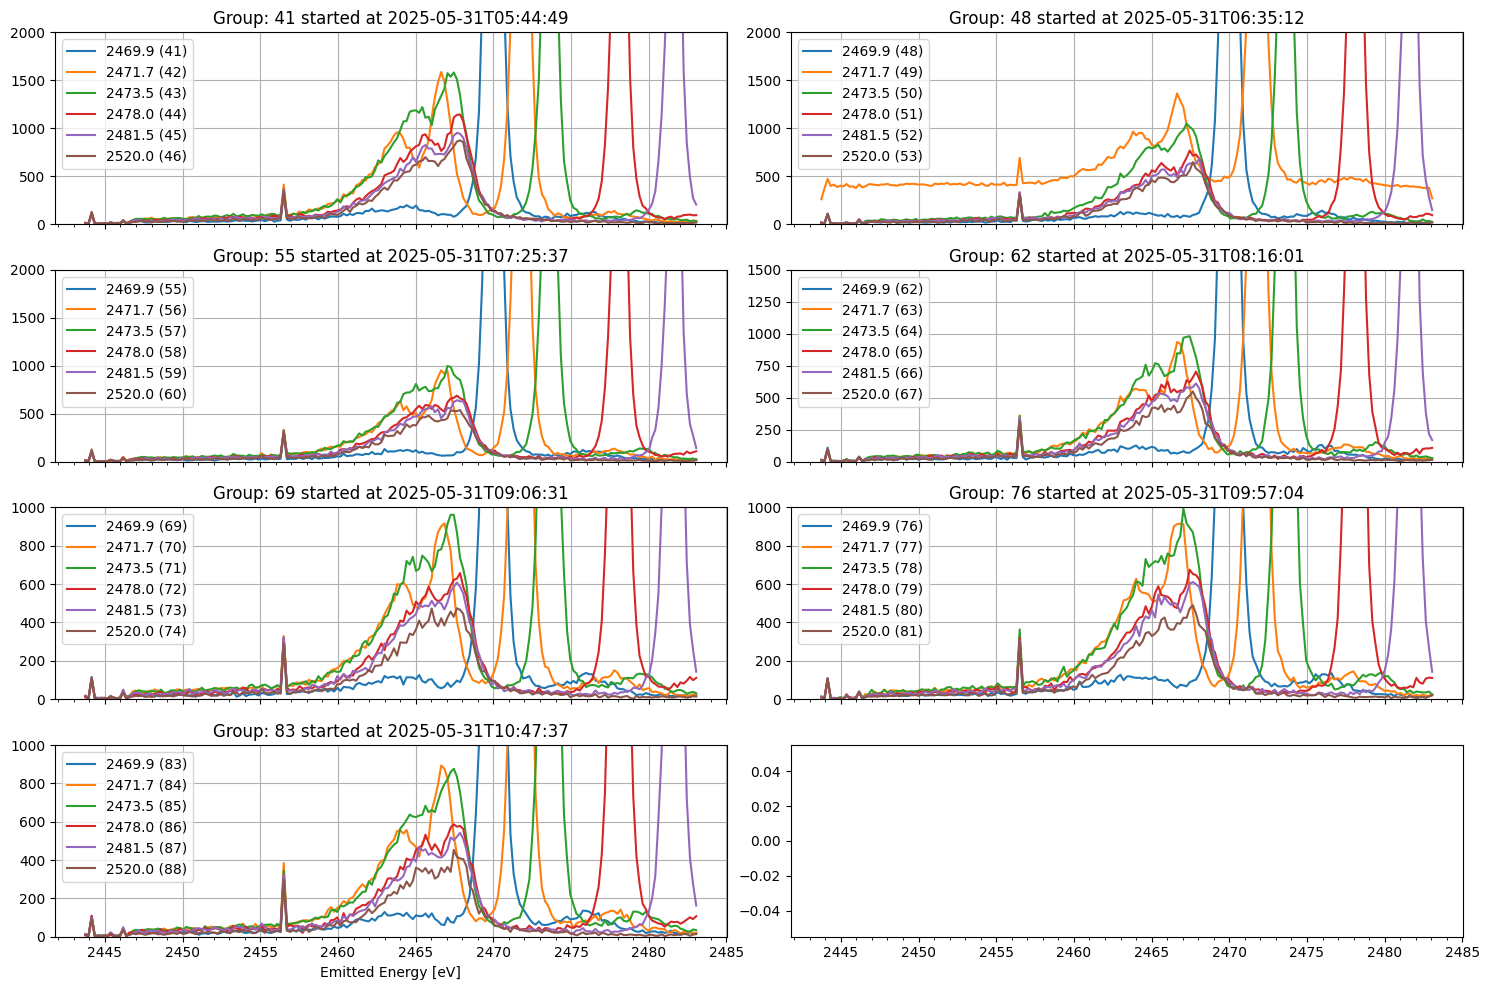

In [145]:
def foo():
    """
    Read all XES files for electrode 22 in two dataframes:
    1. `xes_graphs`: contains the XES spectra for each file.
    2. `data`: contains metadata about each file, including start time, electrode number, index, first index, and energy.

    Then, plot the XES spectra and group them by energy.

    :return:
    """
    logger.setLevel(logging.INFO)
    avas_energies = [2469.9, 2471.7, 2473.5, 2478, 2481.5, 2520]
    electrode = 22
    first_files = range(41, 90, 7)

    xes_graphs = pd.DataFrame()
    data = pd.DataFrame(columns=['start_time', 'electrode', 'i', 'first_index', 'energy'])

    for first_file in first_files:
        for i, e in zip(range(first_file, first_file+7), avas_energies):
            filename = f'Electrode_{electrode}_{i:04d}.nxs'
            if os.path.exists(os.path.join(os.environ['DATA_PATH'], filename)):
                logger.debug(f"Processing {filename} for energy {e}")
                xes, _, info = plot_2Dmap(filename, pixel_calibration, [300, 340],
                                            vmax_sum=100, vmax_rxes=5000,
                                            replace={'energies': [e]}, plot=False
                                            )
                xes_graphs[filename] = xes
                data.loc[filename] = (info['start_time'], electrode, i, first_file, e)

    #################################################################
    # PLOTS grouped by energy
    ylimits = (210, 2000, 2000, 1500, 1000, None)
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharex=True, sharey=False)
    for ax, (e, df), ylim in zip(axs.flat, data.groupby('energy'), ylimits):
        for filename, row in df.iterrows():
            xes_graphs[filename].plot(label=f"{row['start_time']} ({row['i']})", ax=ax)
            ax.grid()
            ax.set_xlabel('Emitted Energy [eV]')
        ax.legend()
        ax.set_ylim(0, ylim)
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.xaxis.grid(True, which='major')
        ax.set_title(f"Incident Energy: {e} eV")

    fig.tight_layout()
    plt.plot()

    #################################################################
    # PLOTs grouped by group
    ylimits = (2000, 2000, 2000, 1500, 1000, 1000, 1000, None)
    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 10), sharex=True, sharey=False)
    for ax, (e, df), ylim in zip(axs.flat, data.groupby('first_index'), ylimits):
        for filename, row in df.iterrows():
            xes_graphs[filename].plot(label=f"{row['energy']} ({row['i']})", ax=ax)
            ax.grid()
            ax.set_xlabel('Emitted Energy [eV]')
        ax.legend()
        ax.set_ylim(0, ylim)
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.xaxis.grid(True, which='major')
        ax.set_title(f"Group: {e} started at {df['start_time'].iloc[0]}")
    fig.tight_layout()
    plt.plot()

    return data

_ = foo()

(None, None)

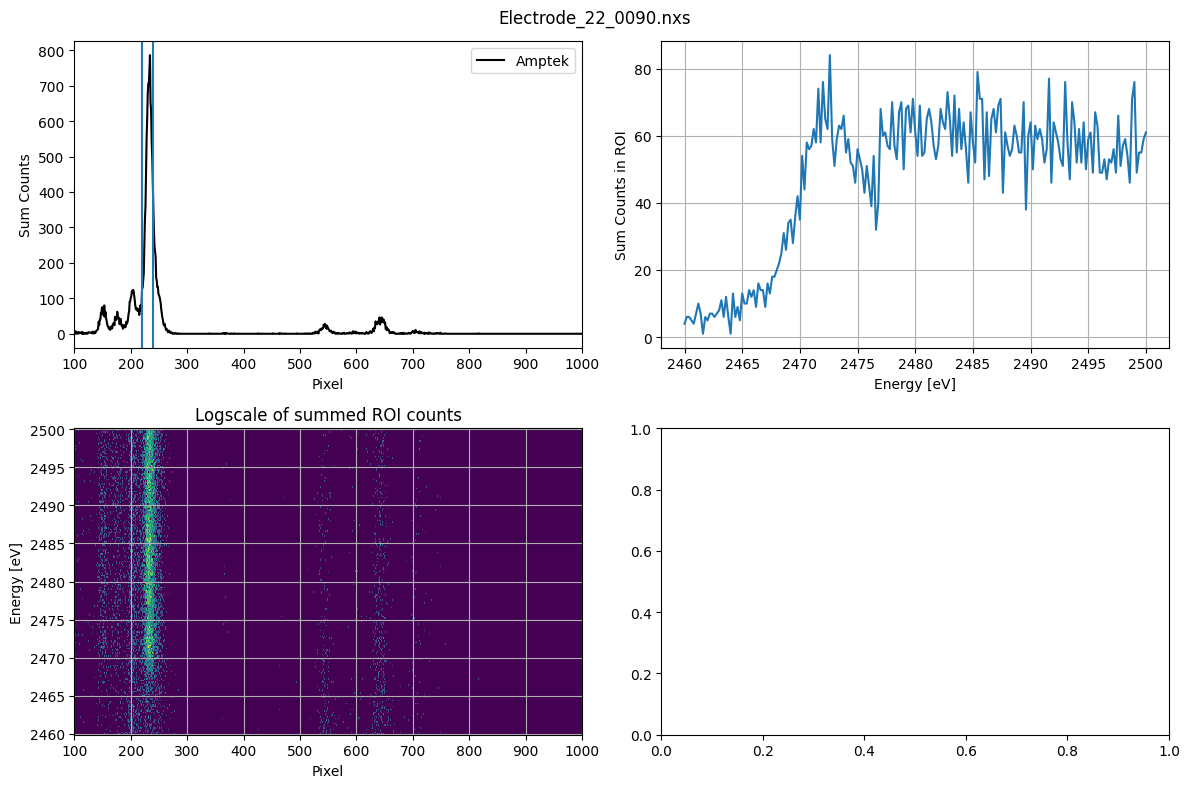

In [147]:
make_sample('Electrode_22_0090.nxs', [[220,240]])

# Electrode 23

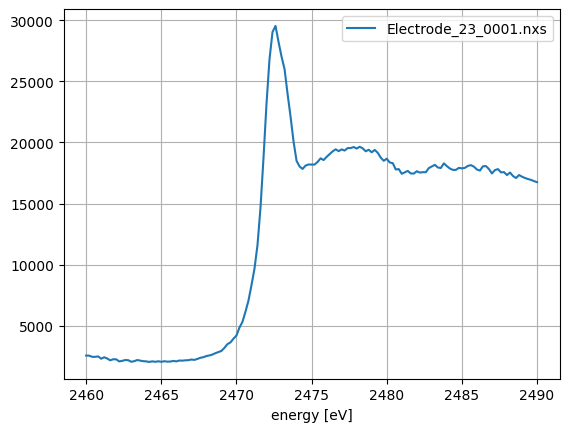

In [157]:
def foo():
    xas, info = make_sample('Electrode_23_0001.nxs', [[220,240]], plot=False)
    xas.plot()
    plt.grid(True)
    # plt.gca().xaxis.set_major_locator(MultipleLocator(0.5))
    # plt.gca().xaxis.set_minor_locator(MultipleLocator(0.1))
    # plt.xlim(2470, 2475)

foo()

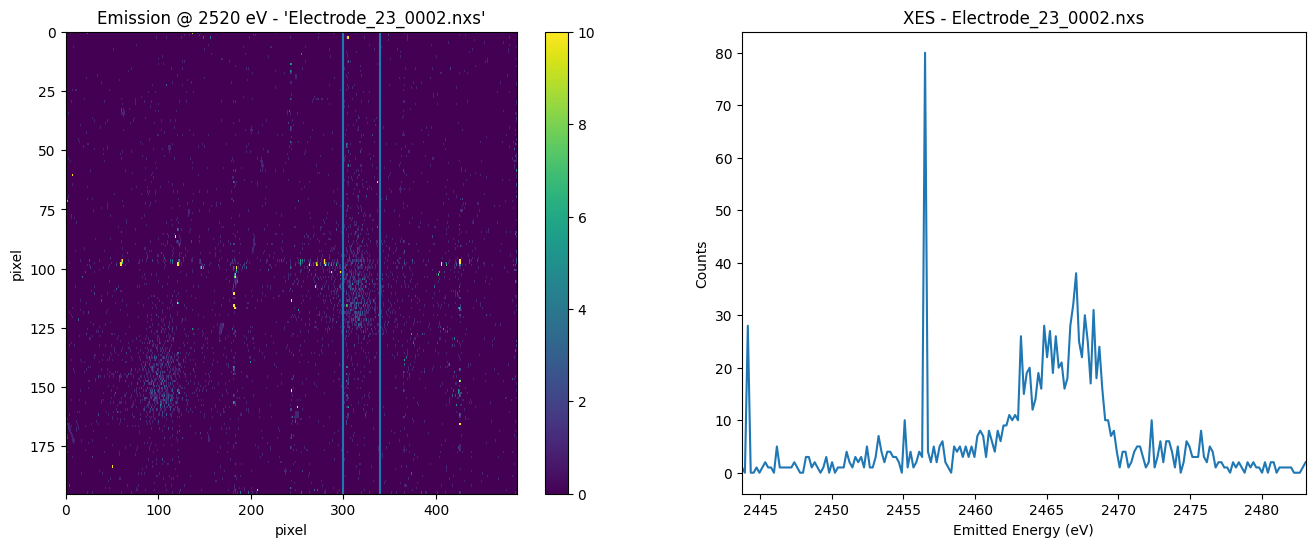

In [168]:
plot_2Dmap('Electrode_23_0002.nxs', pixel_calibration, [300, 340], vmax_sum=10, vmax_rxes=5000,
           replace={'energies': [2520]})

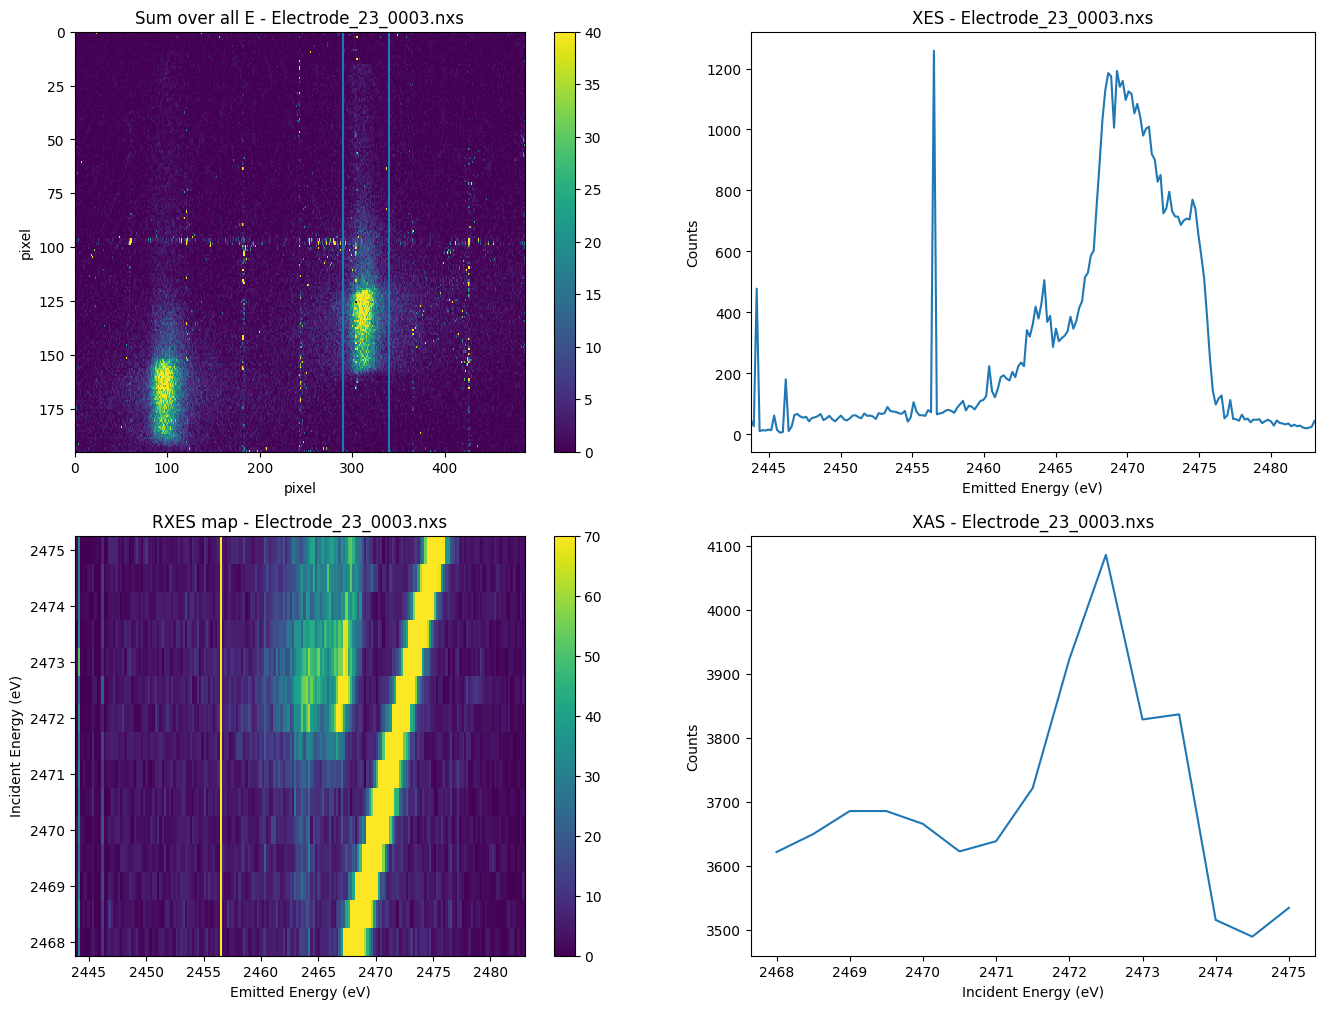

In [167]:
plot_2Dmap('Electrode_23_0003.nxs', pixel_calibration, [290, 340], vmax_sum=40, vmax_rxes=70,
           replace={'energies': np.arange(2468, 2475.1, 0.5)})

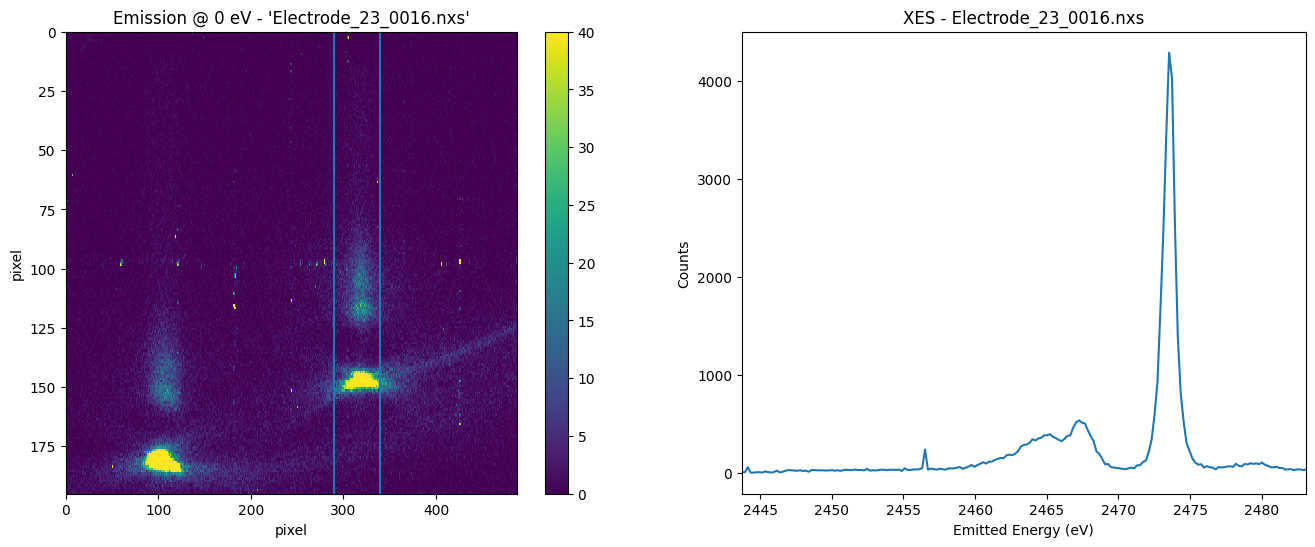

In [171]:
plot_2Dmap('Electrode_23_0016.nxs', pixel_calibration, [290, 340], vmax_sum=40, vmax_rxes=70,
           replace={'energies': [0]})

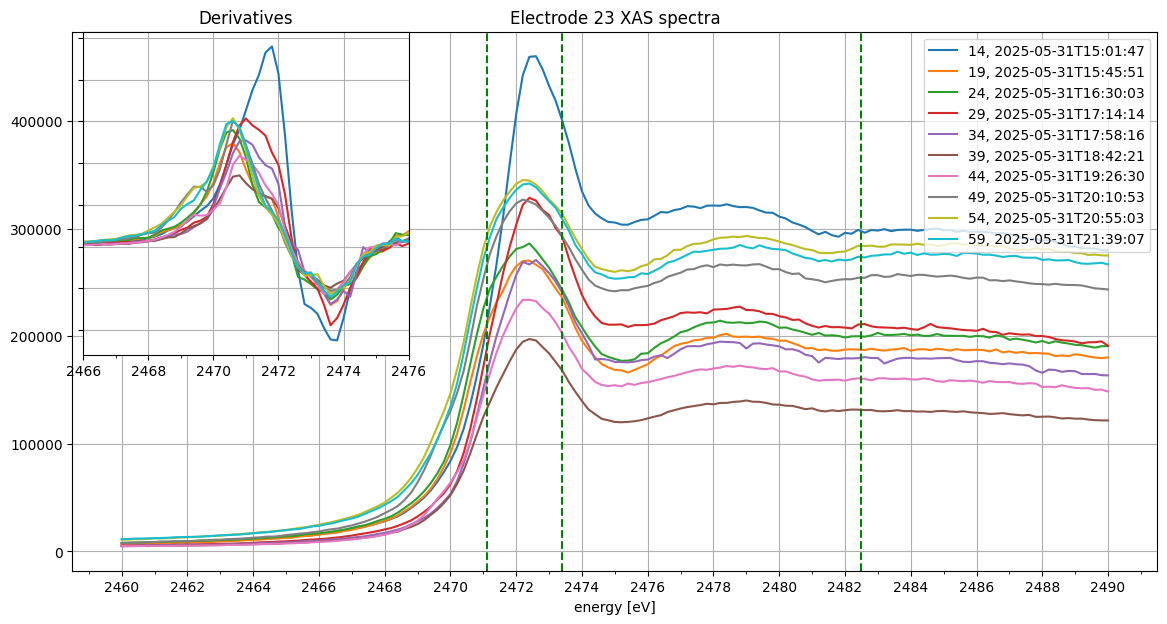

In [10]:
def foo():
    avas_energies = [2471.1, 2473.4, 2482.5, 2520.0]
    leg = []
    ax = None
    plt.figure(figsize=(14, 7))
    dfs: list[pd.Series] = []
    for index in range(14, 1000, 5):
        filename = f'Electrode_23_{index:04d}.nxs'
        ax = plt.gca()
        if os.path.exists(os.path.join(os.environ['DATA_PATH'], filename)):
            df, info = make_sample(filename, [[220, 240]], plot=False)
            df.plot(ax=ax)
            dfs.append(df)
            leg.append(f"{filename}, {info['start_time']}")
    for e in avas_energies[:-1]:
        ax.axvline(e, color='g', linestyle='--')
    plt.grid(True, 'major')
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.legend([l.replace(".nxs", "").replace("Electrode_23_00", "") for l in leg], loc="upper right")
    plt.title("Electrode 23 XAS spectra")
    # plt.show()

    # plt.figure(figsize=(12, 6))
    axin1 = ax.inset_axes([0.01, 0.4, 0.3, 0.6])
    for d in dfs:
        data = d.to_numpy()
        axin1.plot(d.index, np.gradient(data), label=d.name)
    axin1.grid(True, 'major')
    axin1.xaxis.set_major_locator(MultipleLocator(2))
    axin1.xaxis.set_minor_locator(MultipleLocator(1))
    axin1.set_yticklabels([])
    axin1.set_xlim(2466, 2476)
    axin1.set_title("Derivatives")
    plt.plot()

foo()

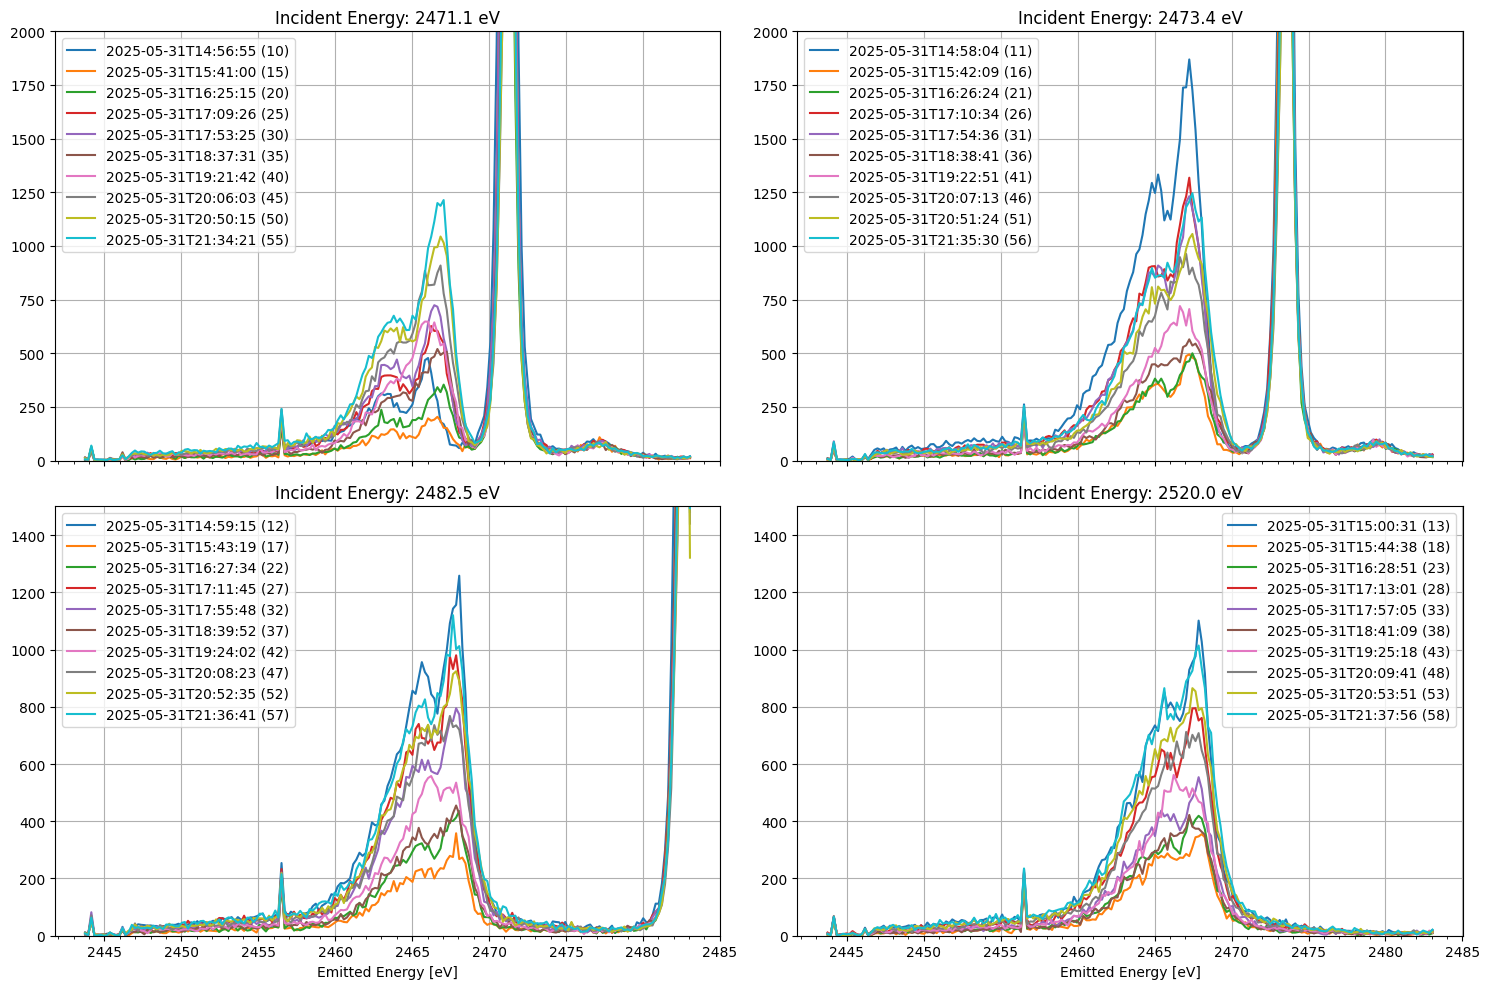

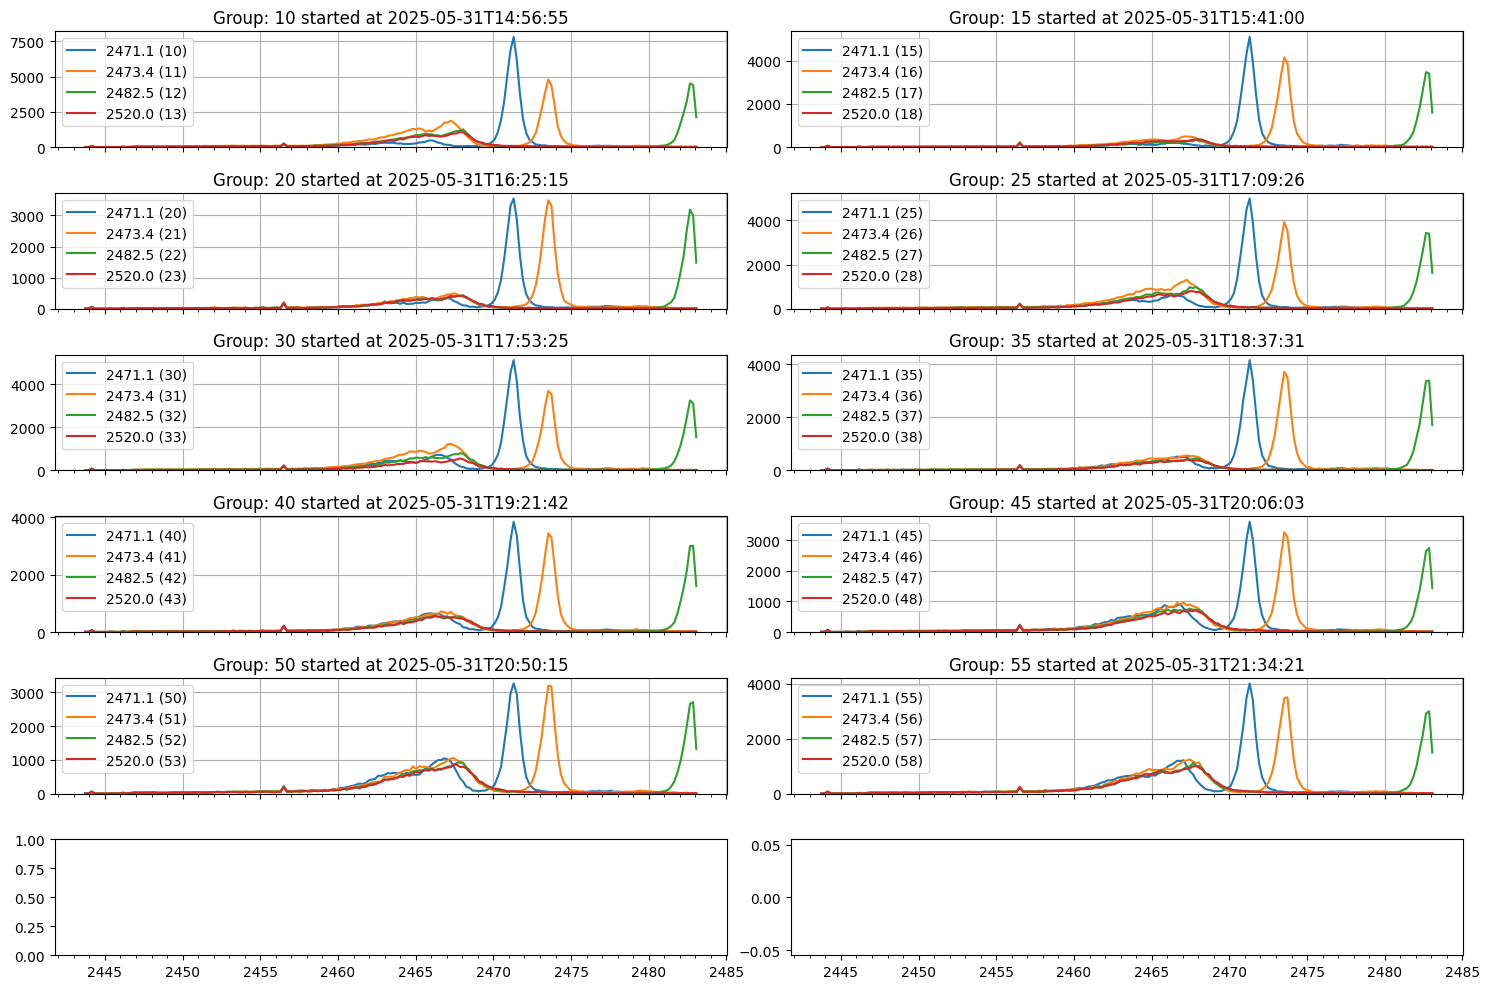

In [262]:
def foo():
    """
    Read all XES files for electrode 23 in two dataframes:
    1. `xes_graphs`: contains the XES spectra for each file.
    2. `data`: contains metadata about each file, including start time, electrode number, index, first index, and energy.

    Then, plot the XES spectra and group them by energy.

    :return:
    """
    logger.setLevel(logging.INFO)
    avas_energies = [2471.1, 2473.4, 2482.5, 2520.0]
    electrode = 23
    first_files = range(10, 90, 5)

    xes_graphs = pd.DataFrame()
    data = pd.DataFrame(columns=['start_time', 'electrode', 'i', 'first_index', 'energy'])

    for first_file in first_files:
        for i, e in zip(range(first_file, first_file+5), avas_energies):
            filename = f'Electrode_{electrode}_{i:04d}.nxs'
            if os.path.exists(os.path.join(os.environ['DATA_PATH'], filename)):
                logger.debug(f"Processing {filename} for energy {e}")
                xes, _, info = plot_2Dmap(filename, pixel_calibration, [300, 340],
                                            vmax_sum=100, vmax_rxes=5000,
                                            replace={'energies': [e]}, plot=False
                                            )
                xes_graphs[filename] = xes
                data.loc[filename] = (info['start_time'], electrode, i, first_file, e)

    #################################################################
    # PLOTS grouped by energy
    ylimits = [2000, 2000, 1500, 1500]
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True, sharey=False)
    for ax, (e, df), ylim in zip(axs.flat, data.groupby('energy'), ylimits):
        for filename, row in df.iterrows():
            xes_graphs[filename].plot(label=f"{row['start_time']} ({row['i']})", ax=ax)
            ax.grid()
            ax.set_xlabel('Emitted Energy [eV]')
        ax.legend()
        ax.set_ylim(0, ylim)
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.xaxis.grid(True, which='major')
        ax.set_title(f"Incident Energy: {e} eV")

    fig.tight_layout()
    plt.plot()

    #################################################################
    # PLOTs grouped by group
    ylimits = [None, None, None, None, None, None] + [None] * 100
    fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15, 10), sharex=True, sharey=False)
    for ax, (e, df), ylim in zip(axs.flat, data.groupby('first_index'), ylimits):
        for filename, row in df.iterrows():
            xes_graphs[filename].plot(label=f"{row['energy']} ({row['i']})", ax=ax)
            ax.grid()
            ax.set_xlabel('Emitted Energy [eV]')
        ax.legend()
        ax.set_ylim(0, ylim)
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.xaxis.grid(True, which='major')
        ax.set_title(f"Group: {e} started at {df['start_time'].iloc[0]}")
    fig.tight_layout()
    plt.plot()

    return data

_ = foo()